In [2]:
# Data analysis and Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline as IMBPipeline

In [4]:
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve

#### Load the Data

In [5]:
# Load Data
sheet_id="1cew2eJA_0YRwYC5BOZdSl8fhTY0hSOVtD0xRfhevlgI"
sheet_name="Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df=pd.read_csv(url)

#### Data Investigation

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 26)

In [8]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [10]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.drop(columns=['id'])

In [14]:
df['classification'] = df['classification'].replace({'notckd':0, 'ckd':1})

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\4034456430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace({'notckd':0, 'ckd':1})


### Selecting X and y

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\82975591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=df, palette='coolwarm')


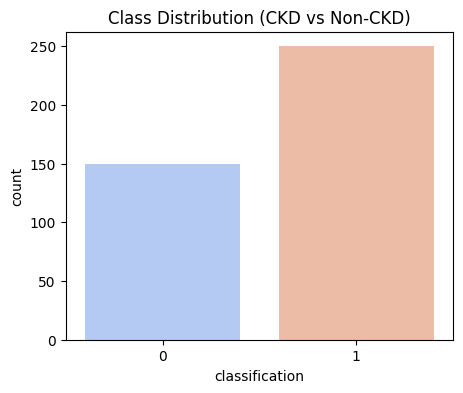

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='classification', data=df, palette='coolwarm')
plt.title("Class Distribution (CKD vs Non-CKD)")
plt.show()


In [ ]:
X=df.drop('classification',axis=1) # Features
y=df['classification']             # Target
# 0 - healthy
# 1 - unhealthy

In [16]:
df['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [17]:
Categorical_features=X.select_dtypes(include='object')
Numerical_features=X.select_dtypes(exclude='object')

### EDA

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


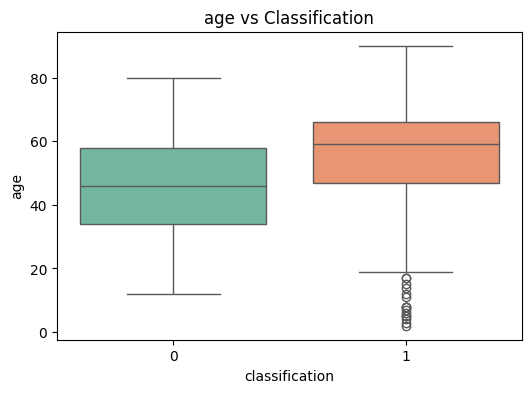

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


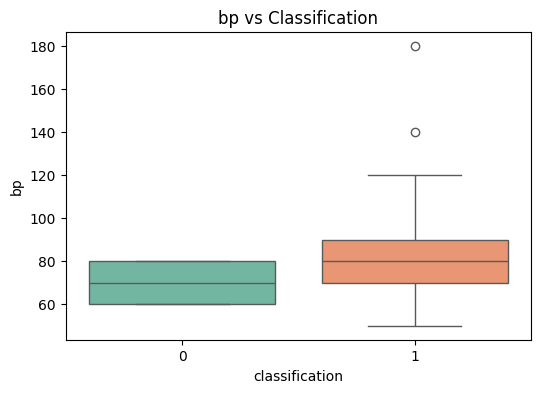

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


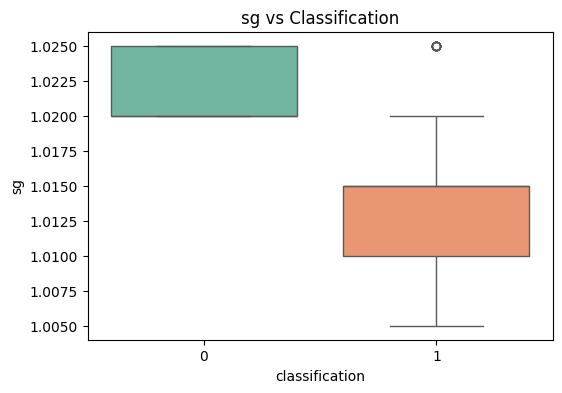

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


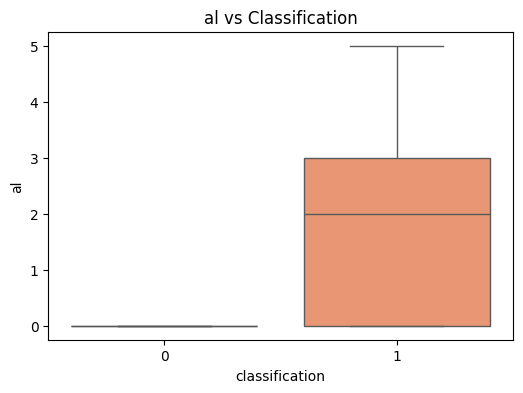

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


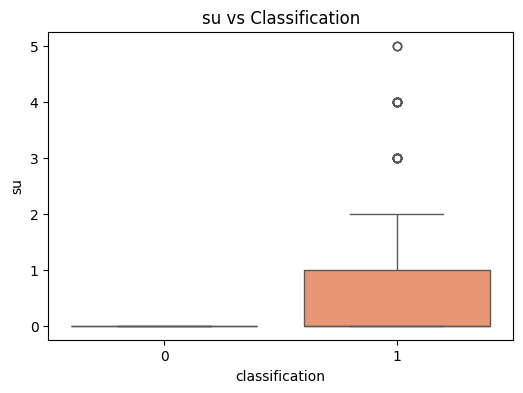

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


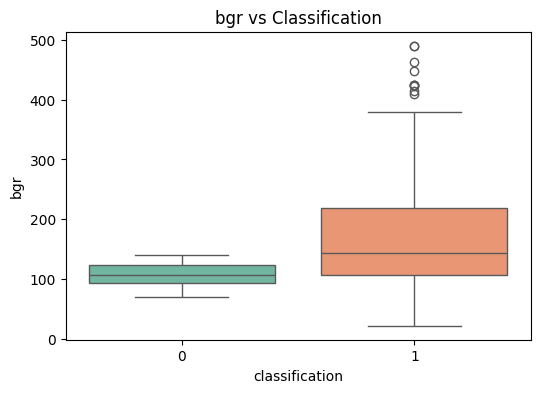

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


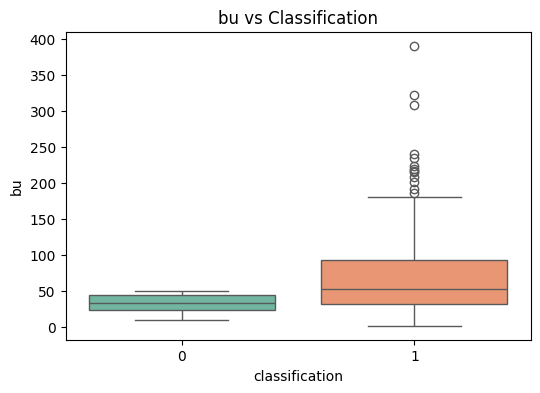

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


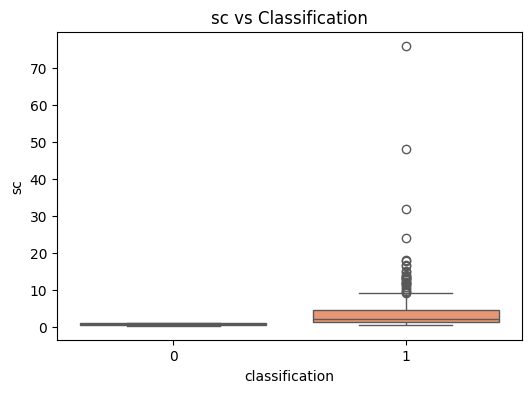

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


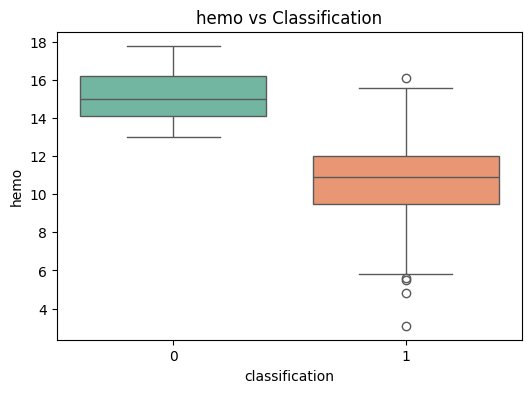

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


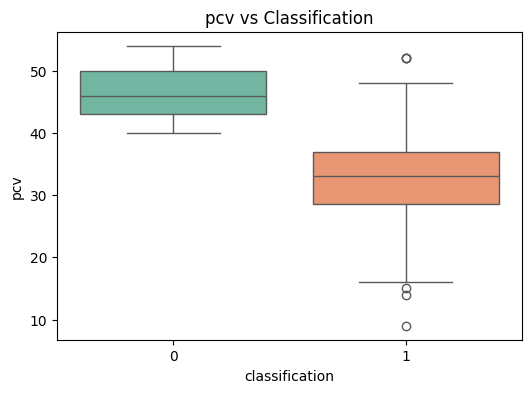

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


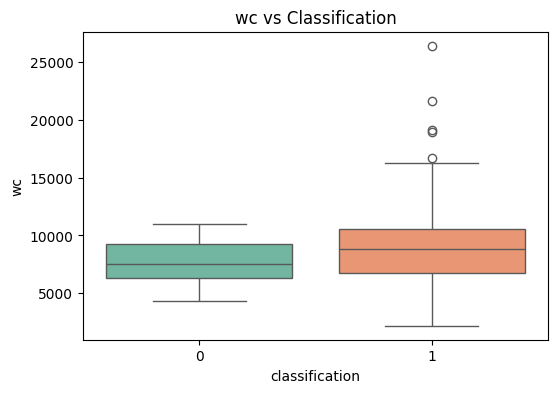

C:\Users\Madhu\AppData\Local\Temp\ipykernel_15660\863038866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='classification', y=col, palette='Set2')


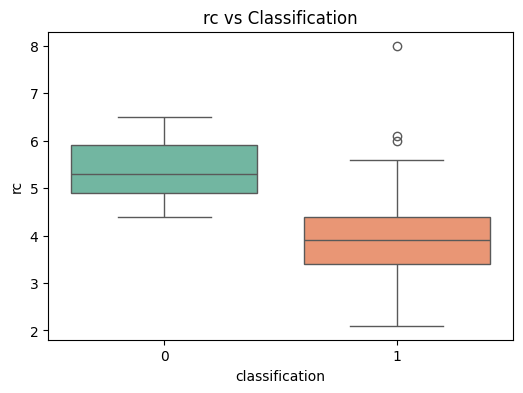

In [36]:
for col in Numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='classification', y=col, palette='Set2')
    plt.title(f"{col} vs Classification")
    plt.show()

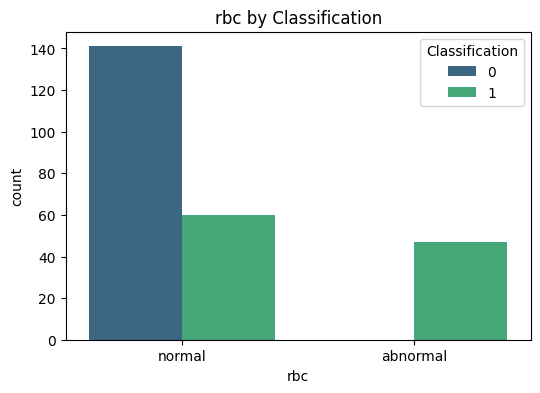

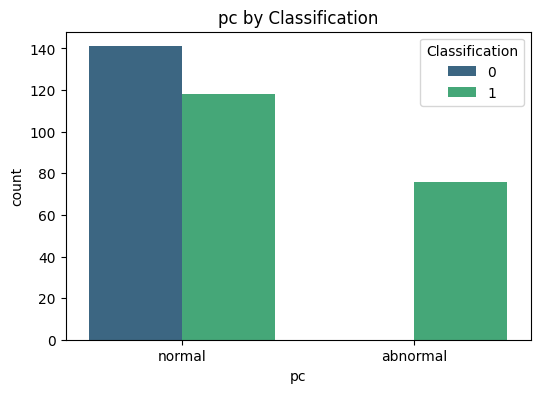

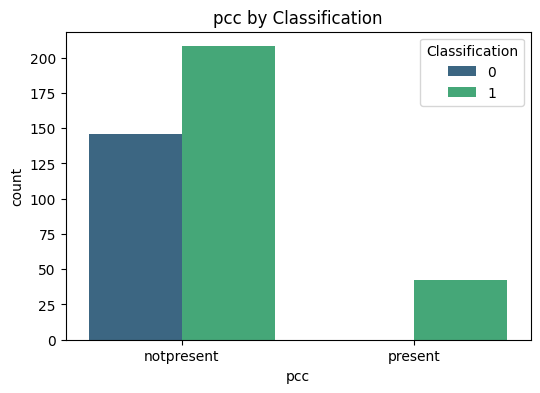

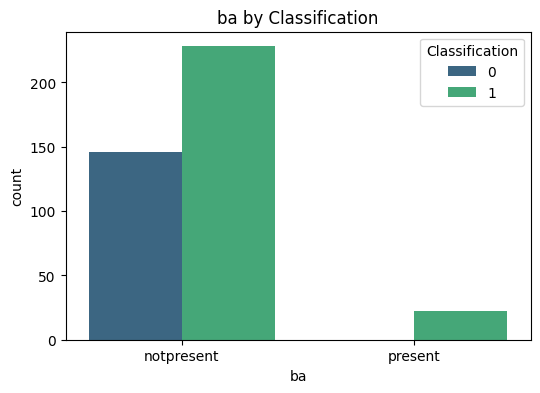

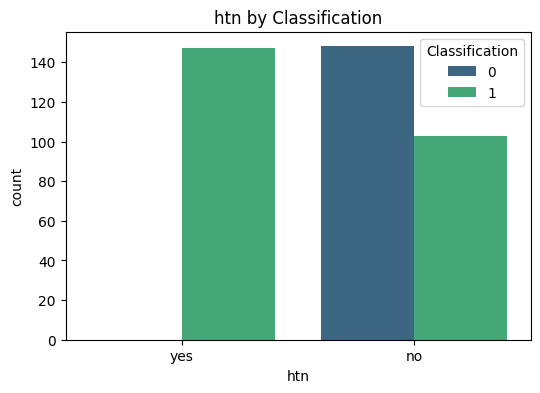

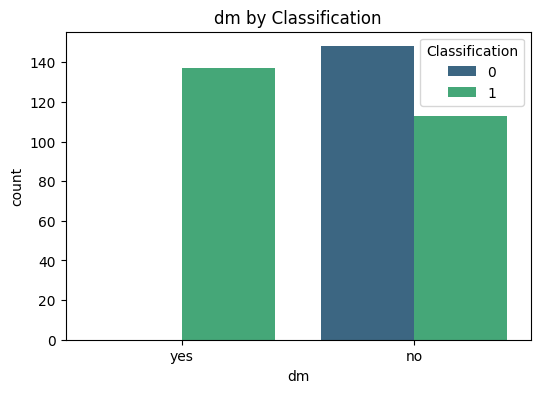

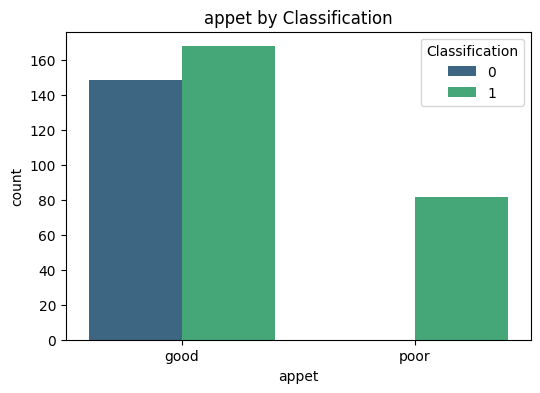

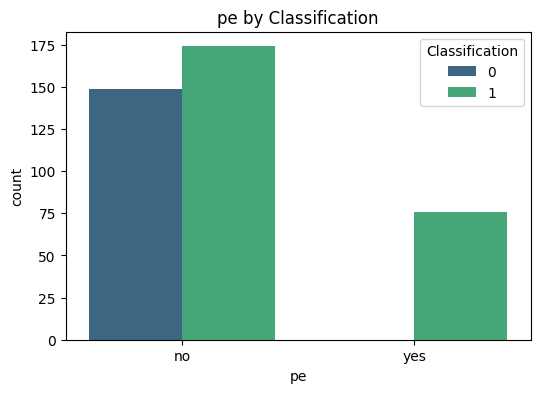

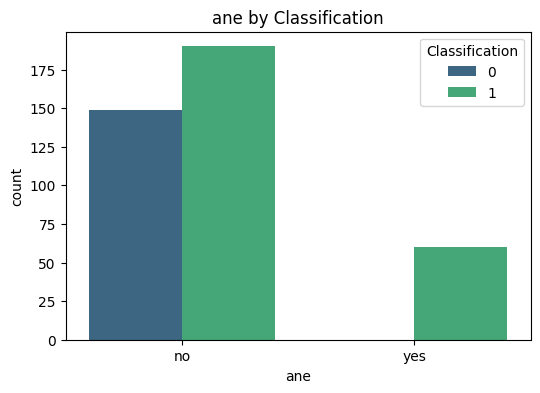

In [38]:
for col in Categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='classification', palette='viridis')
    plt.title(f"{col} by Classification")
    plt.legend(title='Classification')
    plt.show()

### Feature Selection

 ##### Categorical features

In [18]:
Categorical_features.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

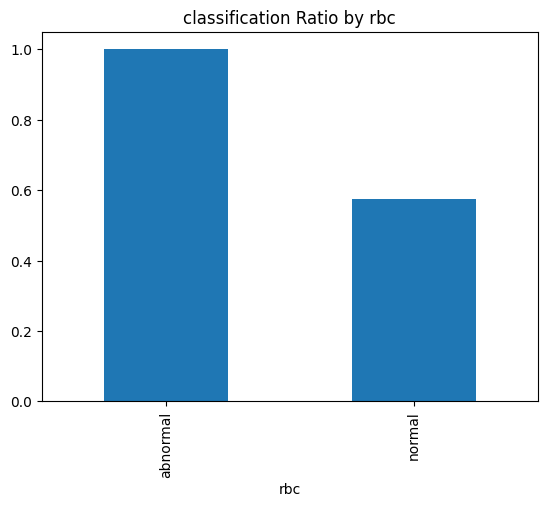

Reject the null hypothesis → ✅rbc and Attrition are related (p=0.000000)


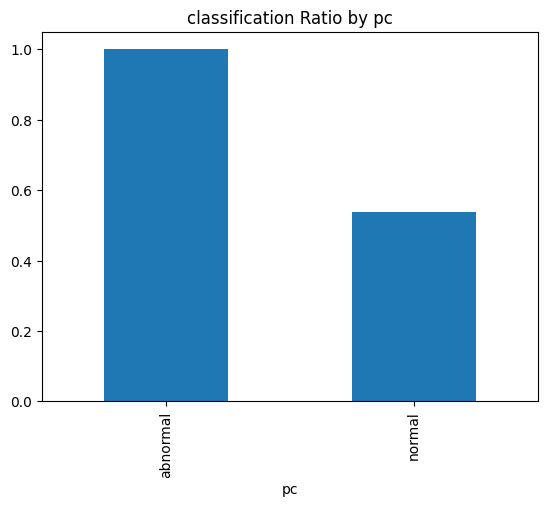

Reject the null hypothesis → ✅pc and Attrition are related (p=0.000000)


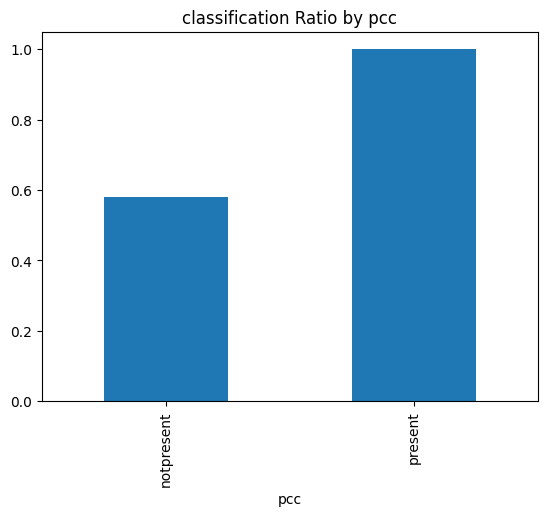

Reject the null hypothesis → ✅pcc and Attrition are related (p=0.000000)


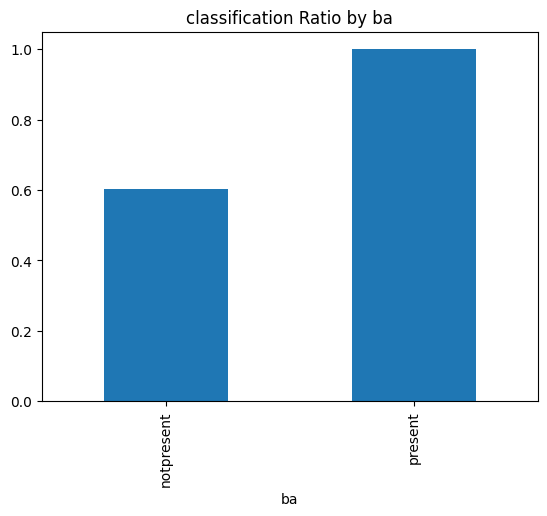

Reject the null hypothesis → ✅ba and Attrition are related (p=0.000010)


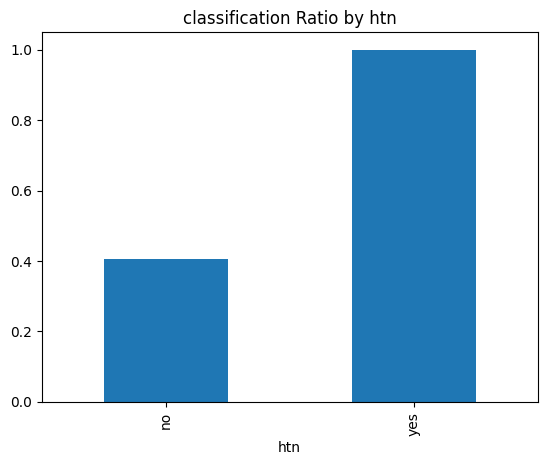

Reject the null hypothesis → ✅htn and Attrition are related (p=0.000000)


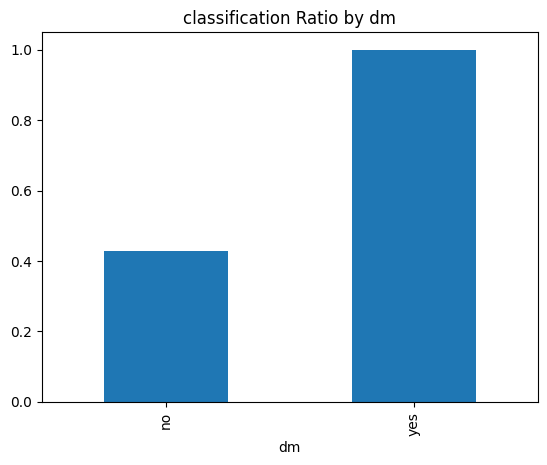

Reject the null hypothesis → ✅dm and Attrition are related (p=0.000000)


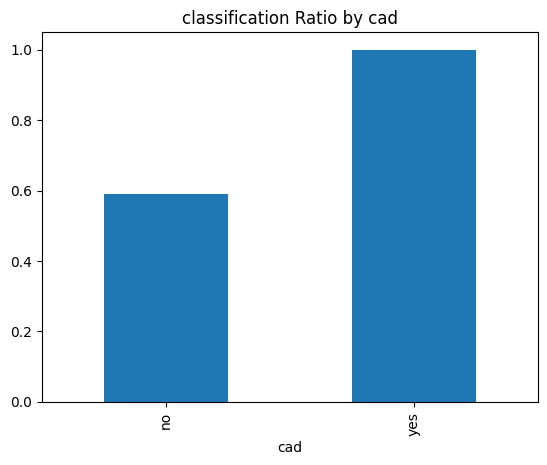

Reject the null hypothesis → ✅cad and Attrition are related (p=0.000001)


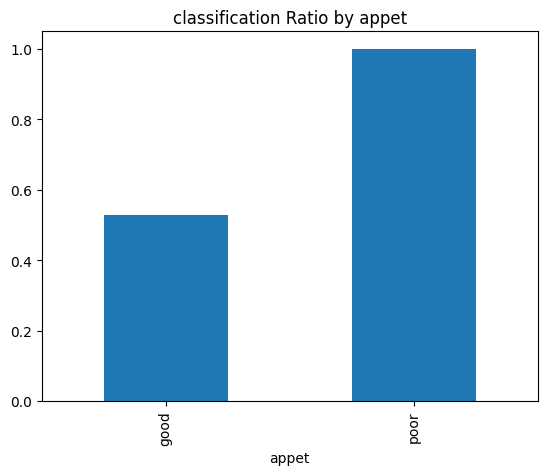

Reject the null hypothesis → ✅appet and Attrition are related (p=0.000000)


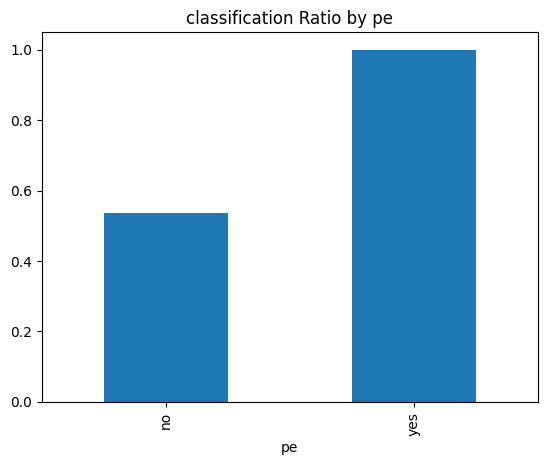

Reject the null hypothesis → ✅pe and Attrition are related (p=0.000000)


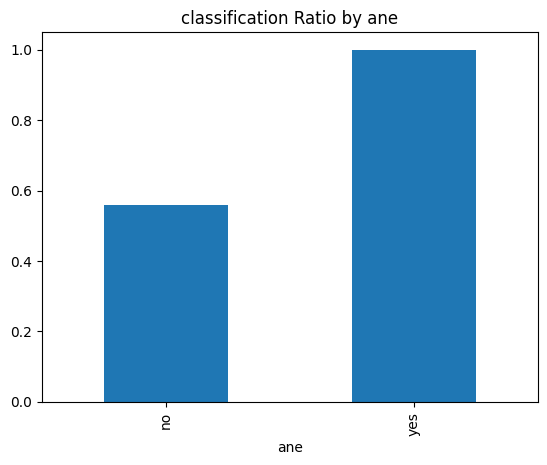

Reject the null hypothesis → ✅ane and Attrition are related (p=0.000000)


In [22]:
from scipy.stats import chi2_contingency
temp_df = df.copy()

for col in Categorical_features:
    temp_df[col] = temp_df[col].fillna(temp_df[col].mode()[0])

for col in Categorical_features:
    # Observed table (actual survey)
    crosstab= pd.crosstab(temp_df[col], temp_df['classification'])
    crosstab['Ratio']=crosstab[1]/(crosstab[0]+crosstab[1])
    crosstab['Ratio'].plot(kind='bar', title=f"classification Ratio by {col}")
    plt.show()
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    # Interpretation
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis → ✅{col} and Attrition are related (p={p:.6f})")
    else:
        print(f"Fail to reject null hypothesis → ❌{col} No relationship (p={p:.6f})")

#### Numerical_Features

In [24]:
from scipy.stats import ttest_ind
temp_df = df.copy()

for col in Numerical_features:
    temp_df[col] = temp_df[col].fillna(temp_df[col].median())


for col in Numerical_features:
    # Class A and B scores
    class_a = temp_df[temp_df['classification']==0][col]
    class_b = temp_df[temp_df['classification']==1][col]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)
    print(f"Feature: {col}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: ✅ class averages are significantly different.")
    else:
        print("Fail to reject the null hypothesis:❌No significant difference.")
    print("-"*60)

Feature: age
t-statistic: -4.6682
p-value: 0.000004
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: bp
t-statistic: -6.1295
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: sg
t-statistic: 17.5031
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: al
t-statistic: -12.5199
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: su
t-statistic: -6.1492
p-value: 0.000000
Reject the null hypothesis: ✅ class averages are significantly different.
------------------------------------------------------------
Feature: bgr
t-statistic: -8.1787
p-value: 0.000000
Reject the null 

### PreProcessing

In [37]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [26]:
selected_features = [
    'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 
    'hemo', 'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 
    'htn', 'dm', 'appet', 'pe', 'ane'
]

In [27]:
X=df[selected_features]
y=df['classification']

In [28]:
Categorical_features=X.select_dtypes(include='object')
Numerical_features=X.select_dtypes(exclude='object')

In [29]:
Numerical_trans=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

Categorical_trans=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoder',OrdinalEncoder())
])

In [30]:
Preprcess=ColumnTransformer(transformers=[
    ('Num_continues',Numerical_trans,Numerical_features.columns),
    ('Categorical',Categorical_trans,Categorical_features.columns)
])
Preprcess

,transformers,"[('Num_continues', ...), ('Categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 21), (80, 21), (320,), (80,))

In [33]:
Lg_pipeline=IMBPipeline(steps=[
    ('Preprcess',Preprcess),
    ('Sampling',SMOTE(random_state=42)),
    ('Model',LogisticRegression())

])

Lg_pipeline.fit(X_train,y_train)

y_train_pred=Lg_pipeline.predict(X_train)
y_test_pred=Lg_pipeline.predict(X_test)

print('Confusion Matrix')
print('Train',confusion_matrix(y_train,y_train_pred))
print('Test',confusion_matrix(y_test,y_test_pred))
print('--'*50)

print('Evaluation on training data')
print(classification_report(y_train,y_train_pred))

print('Evaluation on testing data')
print(classification_report(y_test,y_test_pred))

Confusion Matrix
Train [[122   0]
 [  0 198]]
Test [[28  0]
 [ 1 51]]
----------------------------------------------------------------------------------------------------
Evaluation on training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Evaluation on testing data
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [39]:
import pickle
pickle.dump(Lg_pipeline,open('C:/DS_Programs/Project4_Disease_prediction/kidney_model.pkl','wb'))